In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Temperature2.csv')
# data['Year-Month'] = pd.to_datetime(data['Year-Month'], format="%Y-%m")
data.head(12)

,year,month,Year-Month,Temperature
0,2015,1,2015-1,-0.2
1,2015,2,2015-2,1.2
2,2015,3,2015-3,4.6
3,2015,4,2015-4,9.9
4,2015,5,2015-5,15.1
5,2015,6,2015-6,18.1
6,2015,7,2015-7,22.8
7,2015,8,2015-8,23.6
8,2015,9,2015-9,19.4
9,2015,10,2015-10,12.2


In [3]:
data = data.drop(['year', 'month'], axis=1)
data.isnull().sum()

Year-Month     0
Temperature    0
dtype: int64

In [4]:
data = data.set_index('Year-Month')

Text(0.5, 1.0, 'Temperature data')

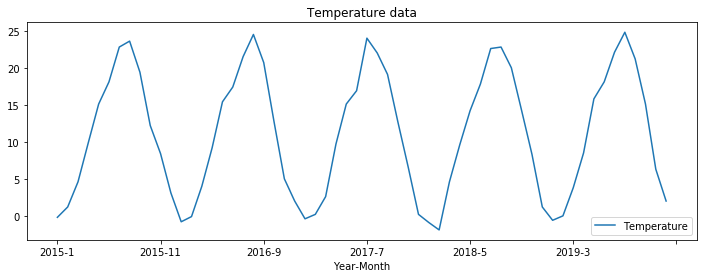

In [5]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Temperature data")
# plt.show(block=False)

In [6]:
train_len = 50
train = data[:train_len]
test = data[train_len:]

In [7]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature']), seasonal_periods = 12 , trend = 'add', seasonal ='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(10)

{'smoothing_level': 0.10526248035982305, 'smoothing_slope': 0.10526891694150398, 'smoothing_seasonal': 0.31578971902784586, 'damping_slope': nan, 'initial_level': 0.009999935634183192, 'initial_slope': 0.009999935634183192, 'initial_seasons': array([ 0.37999742,  1.77998013,  5.17999359, 10.48000078, 15.680006  ,
       18.67999644, 23.3800047 , 24.18000274, 19.98001798, 12.78002136,
        8.97997432,  3.67997704]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


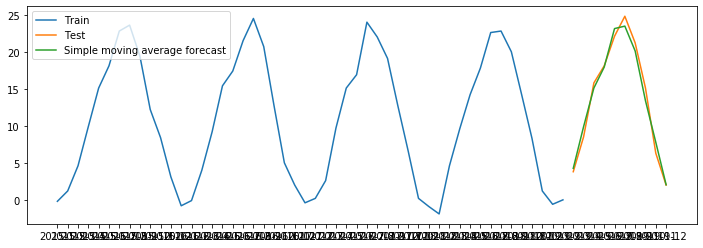

In [8]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')

In [9]:
# calcualte rmse, mape as above
rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature'] - y_hat_hwa['hwa_forecast'])/test['Temperature'])*100, 2)
rmse, mape

(1.08, 8.59)

## Exchange rate data set

In [10]:
data = pd.read_csv('Exchange+Rate+1.csv')
# data['Year-Month'] = pd.to_datetime(data['Year-Month'], format="%Y-%m")
data.head(12)

,Date,Exchange Rate
0,12-08-2019,0.8919
1,13-08-2019,0.8943
2,14-08-2019,0.8973
3,15-08-2019,0.9004
4,16-08-2019,0.9016
5,19-08-2019,0.9012
6,20-08-2019,0.9016


Text(0.5, 1.0, 'Exchange')

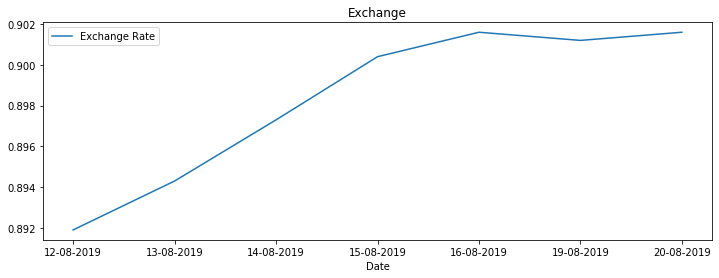

In [11]:
data = data.set_index('Date')
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Exchange")
# plt.show(block=False)

In [12]:
train_len = 5
train = data[:train_len]
test = data[train_len:]

### Naive Method

In [13]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate'][train_len-1] # last observation in train data is our prediction

Text(0.5, 1.0, 'Naive Method')

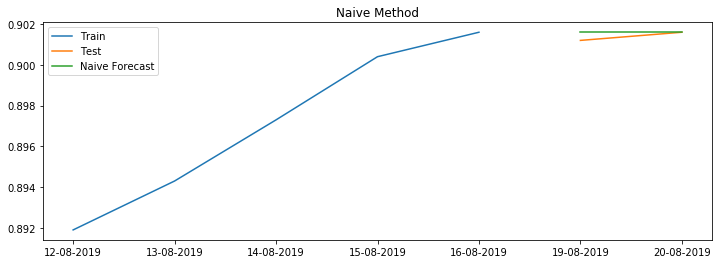

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')

In [15]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat_naive['naive_forecast'])/test['Exchange Rate'])*100, 2)
rmse,mape

(0.0, 0.02)

In [16]:
y_hat_sma = data.copy()
ma_window = 1
y_hat_sma['sma_forecast'] = data['Exchange Rate'].rolling(ma_window).mean()
# adjustment for test period. since the window is not avialable fully we fill it with the first computed value
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len]

Text(0.5, 1.0, 'Naive Method')

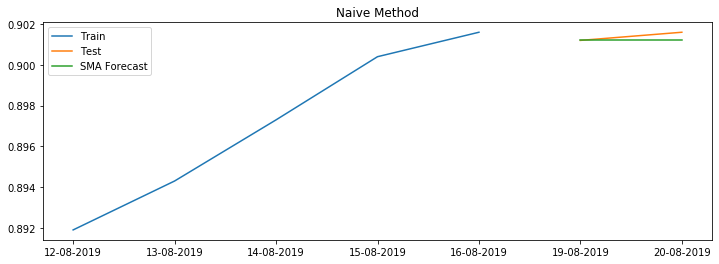

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat_sma['sma_forecast'][train_len:], label='SMA Forecast')
plt.legend(loc='best')
plt.title('Naive Method')

In [18]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate'])*100, 2)
rmse,mape

(0.0, 0.02)

Text(0.5, 1.0, 'Simple Average Method')

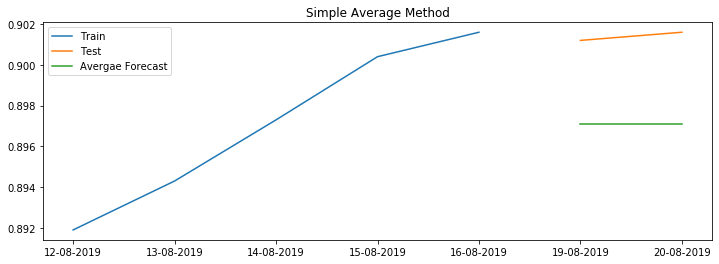

In [19]:
y_hat_average = test.copy()
y_hat_average['avg_forecast'] = train['Exchange Rate'].mean()

plt.figure(figsize=(12, 4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat_average['avg_forecast'], label='Avergae Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')


In [20]:
## Calculate RMSe and MAPE to evaluate forecast

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat_average['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat_average['avg_forecast'])/test['Exchange Rate'])*100, 2)

In [21]:
rmse, mape

(0.0, 0.48)

In [22]:
data = pd.read_csv('Exchange+Rate+2.csv')
# data['Year-Month'] = pd.to_datetime(data['Year-Month'], format="%Y-%m")
data.head(12)

,Date,Exchange Rate
0,01-03-2019,0.8790
1,04-03-2019,0.8828
2,05-03-2019,0.8850
3,06-03-2019,0.8834
4,07-03-2019,0.8917
5,08-03-2019,0.8894
6,11-03-2019,0.8908
7,12-03-2019,0.8868
8,13-03-2019,0.8842
9,14-03-2019,0.8846


Text(0.5, 1.0, 'Exchange')

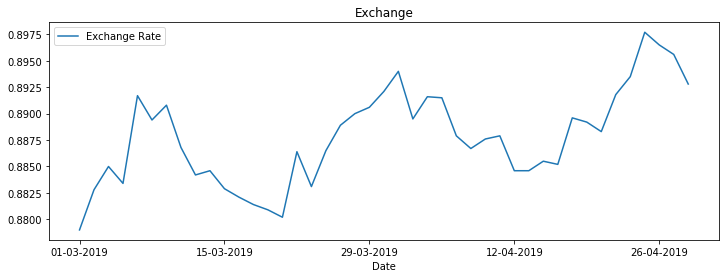

In [23]:
data = data.set_index('Date')
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Exchange")
# plt.show(block=False)

In [1]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter